# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaca (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [9]:
def analise_bivariada(dataframe, variavel_resposta, variavel_explicativa):
    tab = pd.crosstab(dataframe[variavel_explicativa], dataframe[variavel_resposta], margins=True)
    tab['Média dos doentes'] = tab['All'] / tab[1]
    tab['Chance'] = tab[1] / tab[0]
    tab['RP_x_Total'] = tab['Chance'] / tab.loc['All', 'Chance']
    tab['Logito'] = np.log(tab['Chance'])
    tab['WOE'] = np.log(tab['RP_x_Total'])
    return tab

In [12]:
tab_cp = analise_bivariada(df,'flag_doente','cp')
tab_cp

flag_doente,0,1,All,Média dos doentes,Chance,RP_x_Total,Logito,WOE
cp,,,,,,,,
1.0,16,7,23,3.285714,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,5.555556,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,4.777778,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,1.371429,2.692308,3.176536,0.990399,1.155791
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [13]:
tab_exang = analise_bivariada (df,'flag_doente', 'exang')
tab_exang

flag_doente,0,1,All,Média dos doentes,Chance,RP_x_Total,Logito,WOE
exang,,,,,,,,
0.0,141,63,204,3.238095,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,1.302632,3.304348,3.898655,1.195239,1.360632
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [15]:
tab_glic = analise_bivariada (df,'flag_doente', 'fbs')
tab_glic

flag_doente,0,1,All,Média dos doentes,Chance,RP_x_Total,Logito,WOE
fbs,,,,,,,,
0.0,141,117,258,2.205128,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,2.045455,0.956522,1.128558,-0.044452,0.120941
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


A variavel que parece discriminar melhor o risco é a exang: angina induzida por exercício(1 = sim; 0 = não).

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [21]:
def analise_bivariada2(dataframe, variavel_resposta, variavel_explicativa, bins = 5):
    variavel_explicativa_group = pd.qcut(dataframe[variavel_explicativa], bins)
    tab = pd.crosstab(variavel_explicativa_group , dataframe[variavel_resposta], margins=True)
    tab['Média dos doentes'] = tab['All'] / tab[1]
    tab['Chance'] = tab[1] / tab[0]
    tab['RP_x_Total'] = tab['Chance'] / tab.loc['All', 'Chance']
    tab['Logito'] = np.log(tab['Chance'])
    tab['WOE'] = np.log(tab['RP_x_Total'])
    return tab

In [22]:
tab_coles = analise_bivariada2 (df, 'flag_doente', 'trestbps', 5)
tab_coles

flag_doente,0,1,All,Média dos doentes,Chance,RP_x_Total,Logito,WOE
trestbps,,,,,,,,
"(93.999, 120.0]",60,37,97,2.621622,0.616667,0.727578,-0.483427,-0.318034
"(120.0, 126.0]",10,15,25,1.666667,1.500000,1.769784,0.405465,0.570858
"(126.0, 134.0]",35,27,62,2.296296,0.771429,0.910175,-0.259511,-0.094119
"(134.0, 144.6]",34,24,58,2.416667,0.705882,0.832840,-0.348307,-0.182914
"(144.6, 200.0]",25,36,61,1.694444,1.440000,1.698993,0.364643,0.530036
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [29]:
reglog = smf.logit("flag_doente ~ sex + C(cp) +  trestbps + age",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.3097
Time:                        17:32:38   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(cp)[T.2.0]    -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]     0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]     2.4789      0.553      4.485      0.000       1.396       3.562
sex              1.8094      0.353      5.130      0.000       1.118       2.501
trestbps         0.0193      0.009      2.261      0.024       0.003       0.036
age              0.0567      0.018      3.120      0.002       0.021       0.092
================================================================================
"""

##### No modelo criado podemos ver que individuos do sexo masculino tem maior risco de desenvolver a doença e que o aumento da idade e também da pressão sanguinea tem impacto direto para predizer se o paciente desenvolverá doença cardiaca. Já o CP se mostrou sem grande impacto estatístico exceto pelo parâmetro CP = 4 assintomático também apresentou aumento no risco de desenvolvimento de doença cardíaca. 

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [30]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


In [31]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

In [34]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

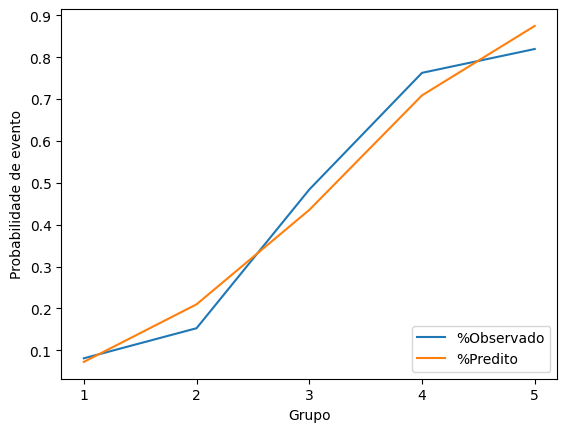

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Observado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

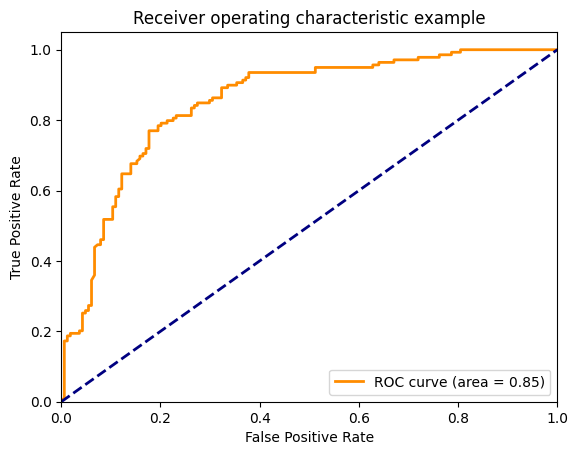

In [37]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

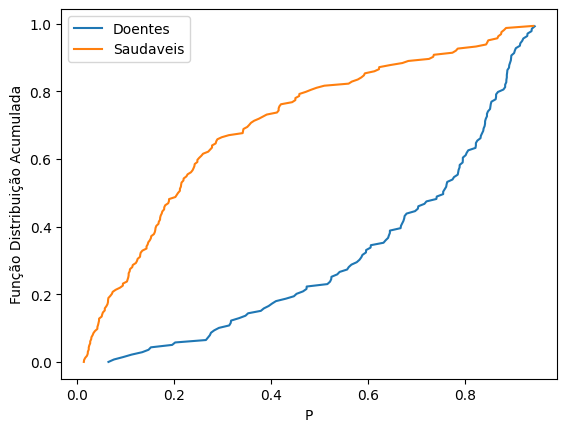

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudaveis')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [39]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'flag_doente',
       'predito', 'predito_1'],
      dtype='object')

In [56]:
reglog1 = smf.logit("flag_doente ~ sex + exang+slope+ trestbps +chol+thalach + ca ",data=df).fit()

df['predito_1'] = reglog1.predict(df)

acc = metrics.accuracy_score(df['flag_doente'], df['predito_1']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_1'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_1'], df.loc[df['flag_doente'] != 1, 'predito_1']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

reglog1.summary()

Optimization terminated successfully.
         Current function value: 0.390657
         Iterations 7
Acurácia: 81.85%
KS: 67.38% 
AUC: 90.34% 
GINI: 80.68%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.4336
Time:                        18:31:13   Log-Likelihood:                -118.37
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.292e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4173      2.088     -2.115      0.034      -8.510      -0.324
ca[T.1.0]      1.7163      0.413      4.151      0.000       0.906       2.527
ca[T.2.0]      3.0016      0.564      5.321      0.000       1.896       4.107
ca[T.3.0]      2.3380      0.733      3.188      0.001       0.901       3.775
ca[T.?]       -0.4837      1.424     -0.340      0.734      -3.275       2.307
sex            1.9042      0.409      4.656      0.000       1.103       2.706
exang          1.5578      0.370      4.213      0.000       0.833       2.283
slope          0.9137      0.277      3.293      0.001       0.370       1.457
trestbps       0.0202      0.009      2.152      0.031       0.002       0.039
chol           0.0067      0.003      2.005      0.045       0.000       0.013
thalach       -0.0284      0.009     -3.194      0.001      -0.046      -0.011
==============================================================================
"""